**Convolution Kernel Exercise**

**Part 1: Edge Detection**

1) Horizontal Edge: Design a 3x3 kernel such that, after convolution, the output image displays the horizontal edges of the input image.

2) Vertical Edge: Design a 3x3 kernel such that, after convolution, the output image displays the vertical edges of the input image.

3) Laplacian: Design a 3x3 kernel such that, after convolution, the output image displays both vertical and horizontal edges.

**Part 2 : Scale**

1) Effect of Image Size: Keeping the kernel size fixed, reduce the image size. Notice which edges are extracted from the image at different resolutions.

2) Effect of Kernel Size: Keeping the image size fixed, increase the kernel size. Notice which edges are extracted from the image with different kernels.


In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.color import rgb2gray, rgba2rgb
from PIL import Image
import urllib

In [ ]:
# set figure params
matplotlib.rcParams['font.size'] = 16

def convolve(in_img, in_kernel):
  return ndimage.convolve(in_img, in_kernel, mode='reflect')


def display_images(in_ref, out_img, title):
  # Create figure
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

  # Display target image
  axes[0].imshow(in_ref, cmap=plt.cm.gray, vmin=0, vmax=1)
  axes[0].set_axis_off()
  axes[0].set_title('Target Output')

  # Ensure output image is scaled between [0,1]
  out_img = ((out_img - np.min(out_img)) / (np.max(out_img) - np.min(out_img)))

  axes[1].imshow(out_img, cmap=plt.cm.gray, vmin=0, vmax=1)
  axes[1].set_axis_off()
  axes[1].set_title('Your Output')

  plt.suptitle(f'{title}')
  plt.show()

def read_img(url):
  return np.array(Image.open(urllib.request.urlopen(url)))

## Part 1: Edge Detection

In [ ]:
# read the original image
taj_img = read_img('https://raw.githubusercontent.com/W281/fileRepository/main/convolution/taj.png')/255. # convert to double

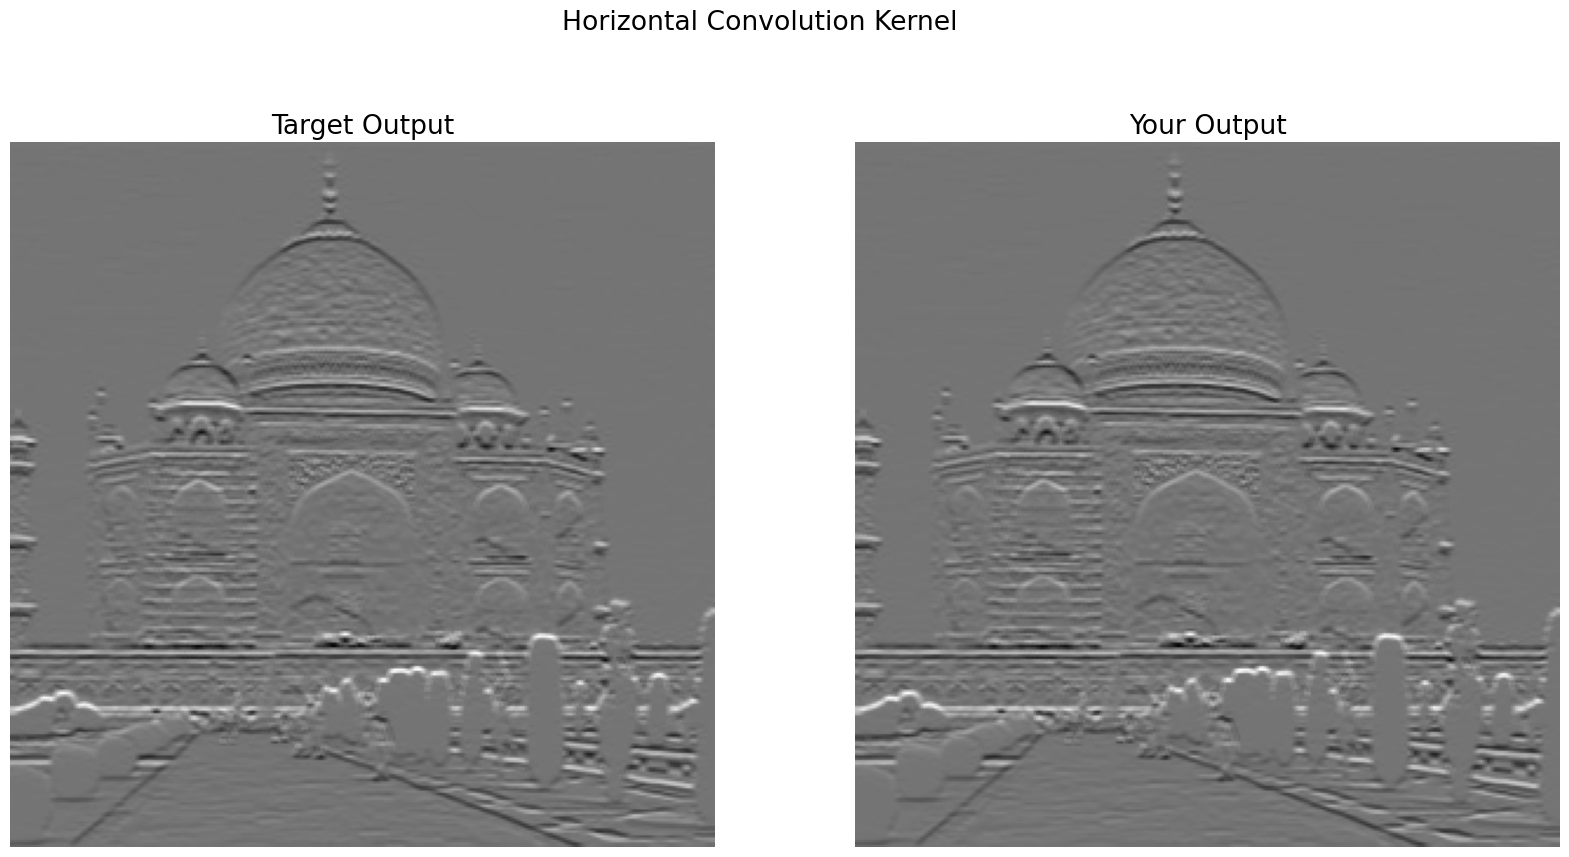

In [ ]:
# TODO: design a 3x3 kernel to extract only horizontal edges and convolve it with the original image

# BEGIN SOLUTION
k_h = np.array([[-1,-1,-1],
                [ 0, 0, 0],
                [ 1, 1, 1]])

h_img = convolve(taj_img, k_h)
# END SOLUTION

# display target img vs your img
h_target = read_img('https://raw.githubusercontent.com/W281/fileRepository/main/convolution/hor_img.png')/255.
display_images(h_target, h_img, 'Horizontal Convolution Kernel')

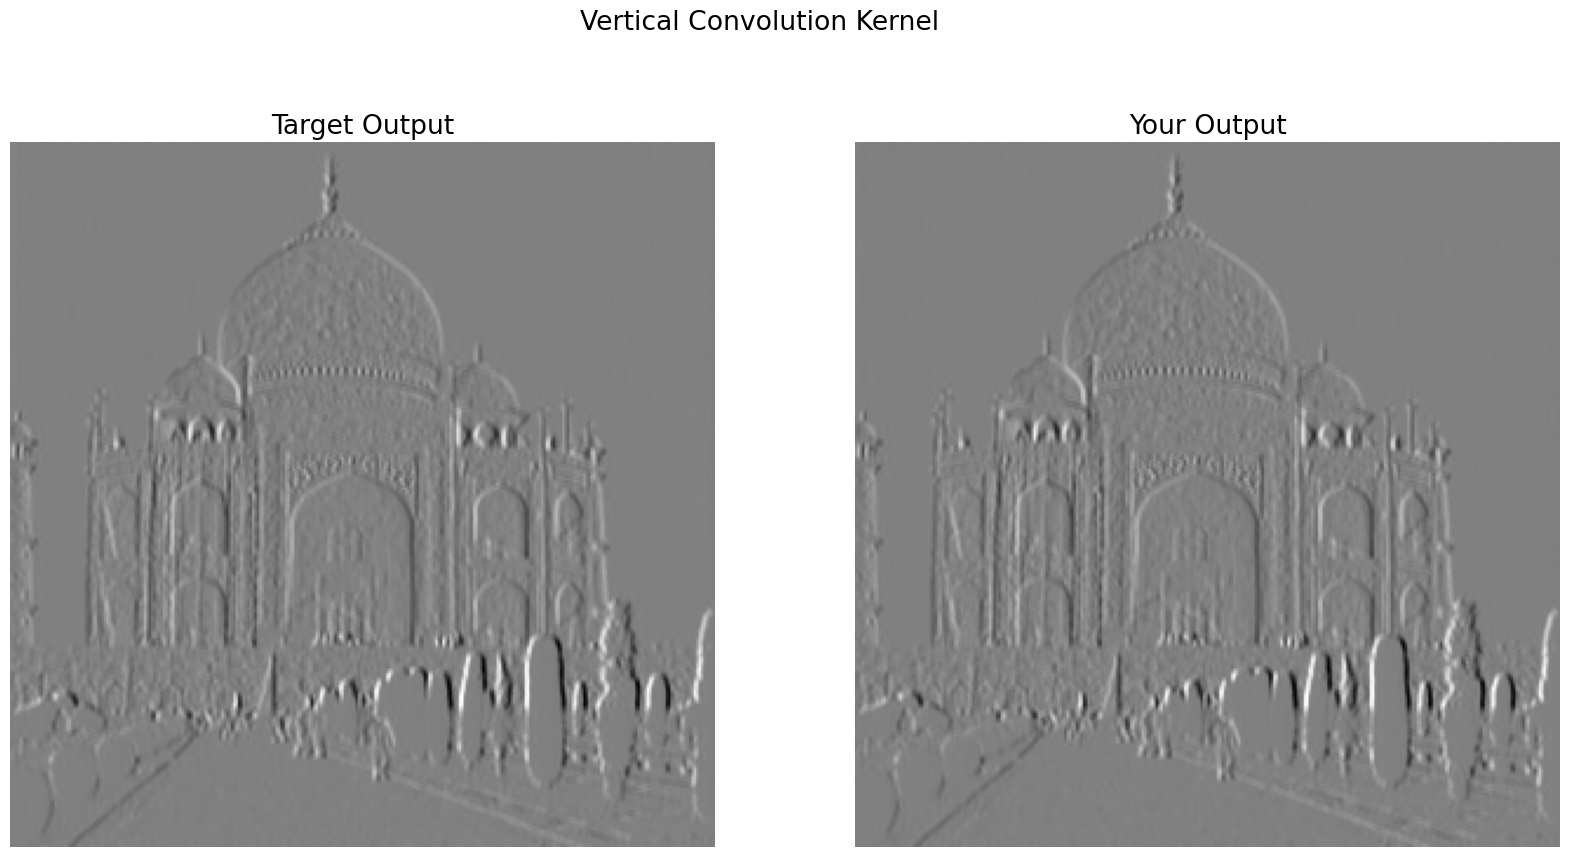

In [ ]:
# TODO: design a 3x3 kernel to extract only vertical edges and convolve it with the original image

# BEGIN SOLUTION
k_v = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

v_img = convolve(taj_img, k_v)
# END SOLUTION

# display target img vs your img
v_target = read_img('https://raw.githubusercontent.com/W281/fileRepository/main/convolution/ver_img.png')/255.
display_images(v_target, v_img, 'Vertical Convolution Kernel')

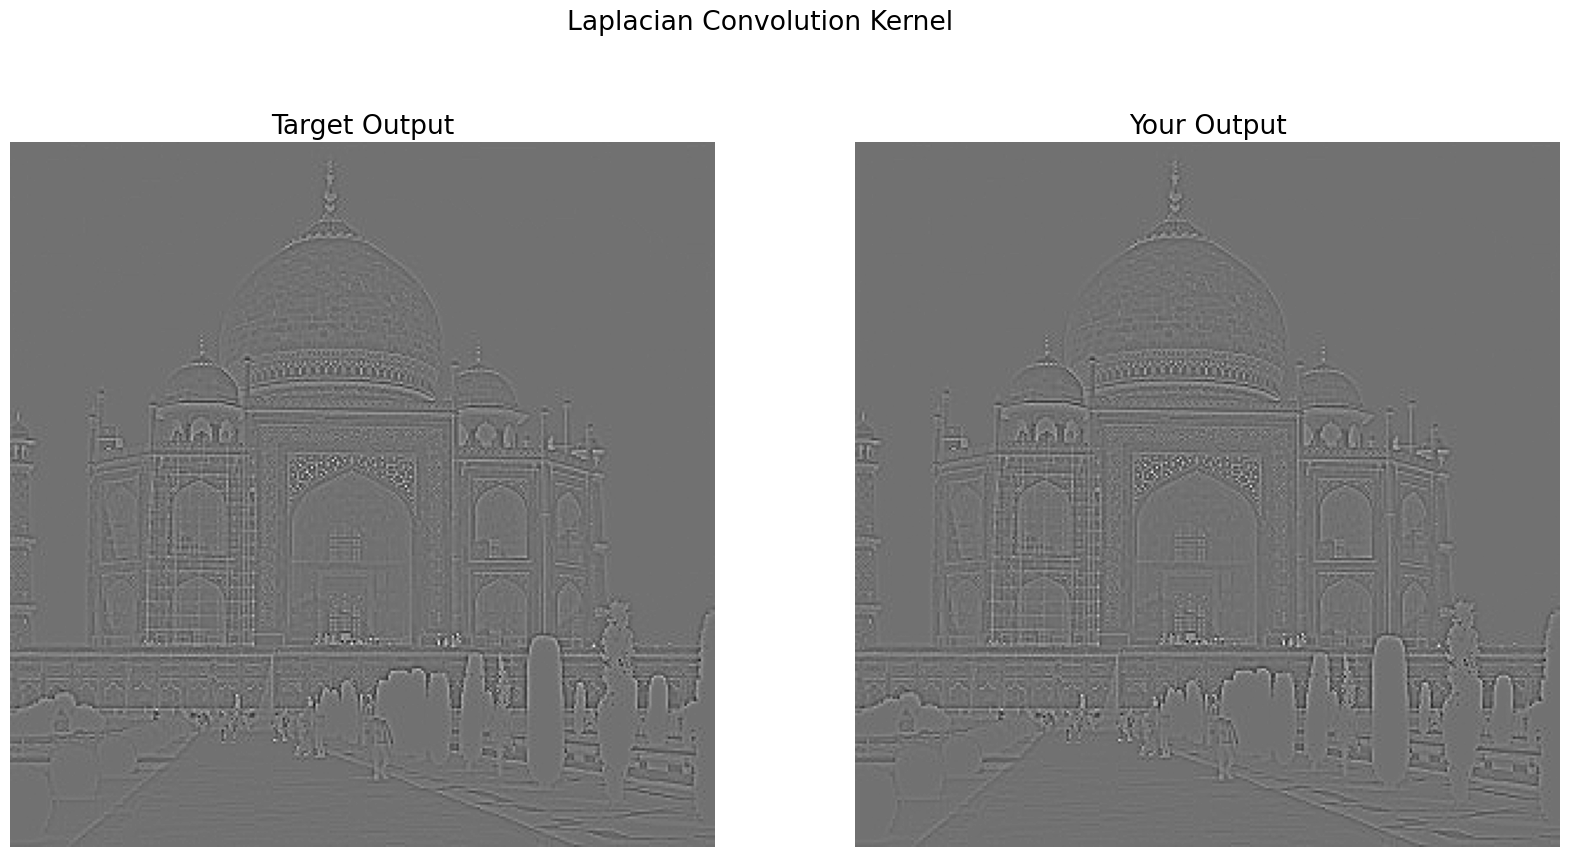

In [ ]:
# TODO: design a 3x3 kernel to extract both horizontal and vertical edges and convolve it with the original image

# BEGIN SOLUTION
k_l = np.array([[0,  1, 0],
                [1, -4, 1],
                [0, 1, 0]])

l_img = convolve(taj_img, k_l)
# END SOLUTION

# display target img vs your img
l_target = read_img('https://raw.githubusercontent.com/W281/fileRepository/main/convolution/lap_img.png')/255.
display_images(l_target, l_img, 'Laplacian Convolution Kernel')

## Part 2: Scale

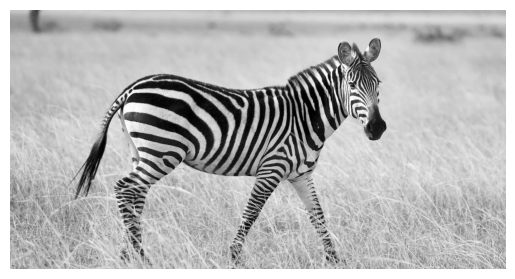

In [ ]:
# read and show the original image
zebra_img = rgb2gray(rgba2rgb(read_img('https://raw.githubusercontent.com/W281/fileRepository/main/live_session/Zebra.png')))

if np.max(zebra_img)>1:
  zebra_img = zebra_img.astype(np.float32)/255.0

img_size = np.array(zebra_img.shape)
plt.imshow(zebra_img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# function to create Laplacian kernels of a certain size
def LapMask(n):
    mask = np.ones((n,n))
    mask[int(np.ceil(n/2))-1, int(np.ceil(n/2))-1] = 1 - n**2
    return mask

In [ ]:
# example kernel outputs
print('3x3 Laplacian Kernel')
print(LapMask(3))
print('5x5 Laplacian Kernel')
print(LapMask(5))
print('9x9 Laplacian Kernel')
print(LapMask(9))

3x3 Laplacian Kernel
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
5x5 Laplacian Kernel
[[  1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.]
 [  1.   1. -24.   1.   1.]
 [  1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.]]
9x9 Laplacian Kernel
[[  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1. -80.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]]


# Effect of Image Size (constant kernel size)

3x3 Laplacian Kernel
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]


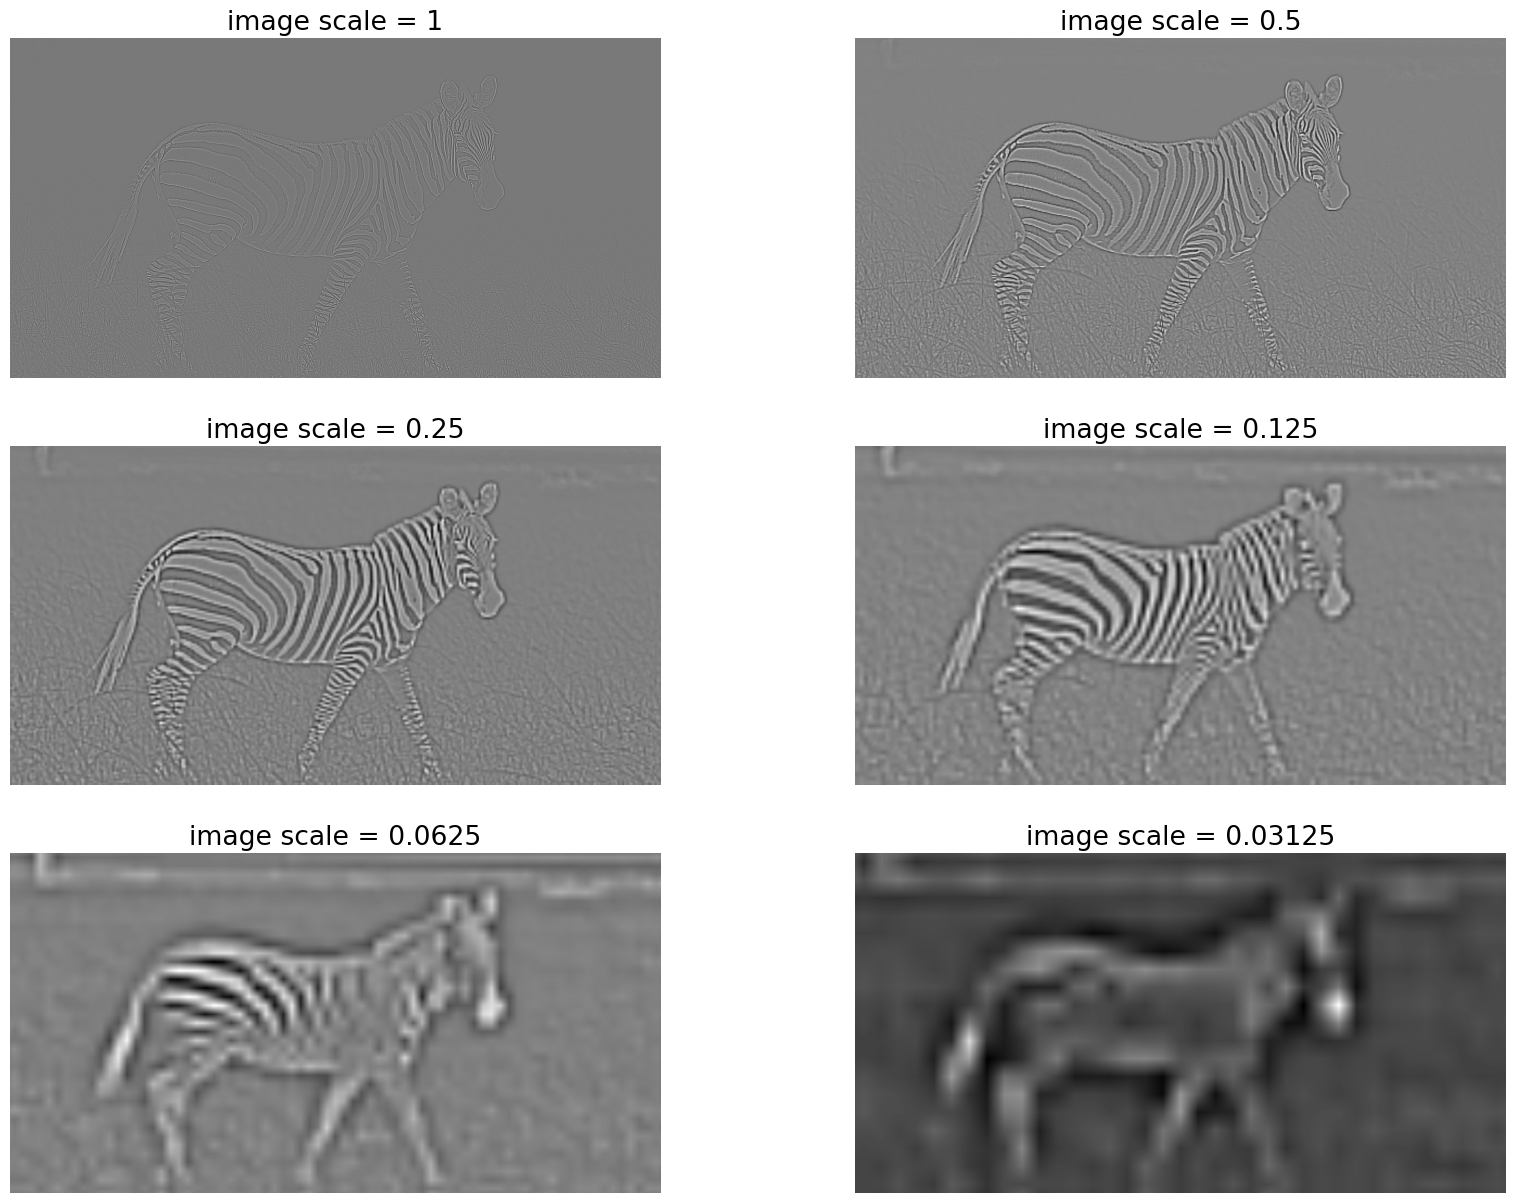

In [ ]:
# create figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# kernel of size 3x3
laplace = LapMask(3)
print('3x3 Laplacian Kernel')
print(laplace)

# halve the image size 5 times
scales = [1]
for i in range(5):
  scales.append(scales[-1]*0.5)

for i, s in enumerate(scales):
  # BEGIN SOLUTION
  # downsample image by scale factor
  # round new image dimensions to the closest pixel
  resized_image = resize(zebra_img, (s*img_size[:2]).astype(np.int32))

  # apply the laplacian filter to the downsampled image
  # then upsample back to the original size
  out_im = resize(convolve(resized_image, laplace), img_size[:2])
  # END SOLUTION

  # plot each image
  axes[i].imshow(out_im, cmap='gray')
  axes[i].set_title(f'image scale = {s}')
  axes[i].axis('off')

plt.show()

# Effect of Kernel Size (constant image size)

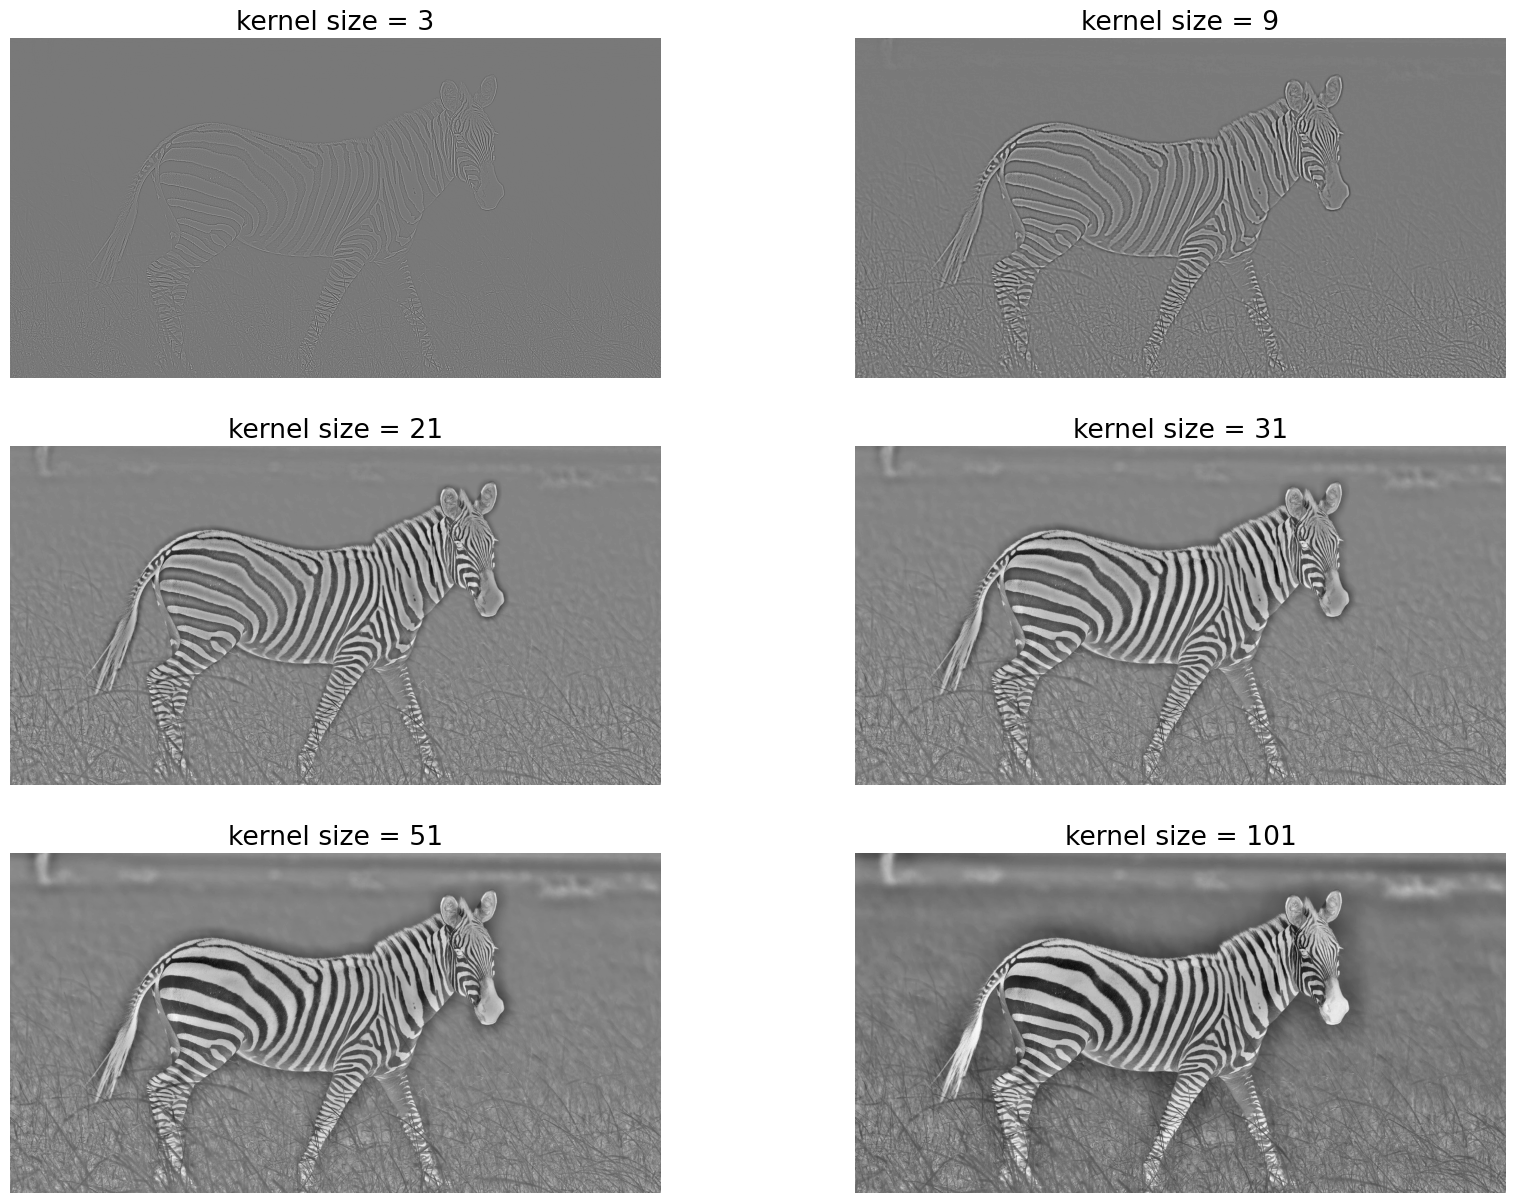

In [ ]:
# create figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# halve the kernel size 4 times
scales = [3, 9, 21, 31, 51, 101]

for i, s in enumerate(scales):
  # BEGIN SOLUTION
  # create a laplacian kernel according to the current scale
  kernel = LapMask(s)

  # apply the laplacian filter to the original image
  out_im = convolve(zebra_img, kernel)
  # END SOLUTION

  # plot output image for each scale
  axes[i].imshow(out_im, cmap='gray')
  axes[i].set_title(f'kernel size = {s}')
  axes[i].axis('off')

plt.show()